In [17]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import cv2
import dlib
from shapely import geometry
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

<img src="68-face-landmarks.png" />

In [18]:
point_names = {
    '0': 'L_ear_top',
    '1': 'L_ear_mid',
    '2': 'L_ear_bot',
    '3': 'L_cheek_top',
    '4': 'L_cheek_tm',
    '5': 'L_cheek_bm',
    '6': 'L_cheek_bot',
    '7': 'L_chin',
    '8': 'chin_tip',
    '9': 'R_chin',
    '10': 'R_cheek_bot',
    '11': 'R_cheek_bm',
    '12': 'R_cheek_tm',
    '13': 'R_cheek_top',
    '14': 'R_ear_bot',
    '15': 'R_ear_mid',
    '16': 'R_ear_top',
    '17': 'L_brow_left',
    '18': 'L_brow_lm',
    '19': 'L_brow_mid',
    '20': 'L_brow_rm',
    '21': 'L_brow_right',
    '22': 'R_brow_left',
    '23': 'R_brow_lm',
    '24': 'R_brow_mid',
    '25': 'R_brow_rm',
    '26': 'R_brow_right',
    '27': 'nose_top',
    '28': 'nose_bridge',
    '29': 'nose_mid',
    '30': 'nose_tip',
    '31': 'nose_left',
    '32': 'nose_lb',
    '33': 'nose_bot',
    '34': 'nose_rb',
    '35': 'nose_right',
    '36': 'L_eye_left',
    '37': 'L_eye_tl',
    '38': 'L_eye_tr',
    '39': 'L_eye_right',
    '40': 'L_eye_br',
    '41': 'L_eye_bl',
    '42': 'R_eye_left',
    '43': 'R_eye_tl',
    '44': 'R_eye_tr',
    '45': 'R_eye_right',
    '46': 'R_eye_br',
    '47': 'R_eye_bl',
    '48': 'lip_outer_left',
    '49': 'lip_outer_tl',
    '50': 'lip_outer_tml',
    '51': 'lip_outer_tmid',
    '52': 'lip_outer_tmr',
    '53': 'lip_outer_tr',
    '54': 'lip_outer_right',
    '55': 'lip_outer_br',
    '56': 'lip_outer_bmr',
    '57': 'lip_outer_bmid',
    '58': 'lip_outer_bml',
    '59': 'lip_outer_bl',
    '60': 'lip_inner_left',
    '61': 'lip_inner_tl',
    '62': 'lip_inner_top',
    '63': 'lip_inner_tr',
    '64': 'lip_inner_right',
    '65': 'lip_inner_br',
    '66': 'lip_inner_bot',
    '67': 'lip_inner_bl'
}

In [19]:
landmark_number = {point_names[str(n)]: n for n in range(0, 68)}

In [20]:
# Get current working directory
cwd = os.getcwd()

In [21]:
def get_landmarks(movie_path):

    input_movie = cv2.VideoCapture(movie_path)
    length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(cwd +
                                     "/shape_predictor_68_face_landmarks.dat")

    frame_number = 0

    point_colors = [(n * 255 / 78, n * 255 / 78, 100) for n in range(10, 78)]

    frame_dict = {'frame': []}
    for i in range(0, 68):
        frame_dict[str(i)] = []

    while True:
        # Grab a single frame of video
        ret, frame = input_movie.read()

        if frame_number % (length // 20) == 0:
            print(
                f"{frame_number} of {length} | {int(frame_number/length*100)}%"
            )
        # Quit when the input video file ends
        if not ret:
            break

        heigth = int(input_movie.get(cv2.CAP_PROP_FRAME_HEIGHT))
        width = int(input_movie.get(cv2.CAP_PROP_FRAME_WIDTH))

        frame = cv2.resize(frame, (width // 2, heigth // 2))
        frame = cv2.rotate(frame, 0)

        frame_number += 1

        # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
        rgb_frame = frame[:, :, ::-1]

        faces = detector(rgb_frame)
        # TODO: what if multiple faces?
        for face in faces:
            x1 = face.left()
            y1 = face.top()
            x2 = face.right()
            y2 = face.bottom()
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 1)

            landmarks = predictor(rgb_frame, face)

            # Store frame info to frame_dict
            frame_dict['frame'].append(frame_number)

            for n in range(0, 68):
                x = landmarks.part(n).x
                y = landmarks.part(n).y
                cv2.circle(frame, (x, y), 2, point_colors[n], -1)

                # Store all point_info to frame_dict
                frame_dict[str(n)].append([x, y])

        cv2.imshow("Frame", frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()
    df = pd.DataFrame.from_dict(frame_dict)
    df.set_index('frame', drop=True, inplace=True)
    return df

In [22]:
df = get_landmarks("it's me dude.mp4")

0 of 135 | 0%
6 of 135 | 4%
12 of 135 | 8%
18 of 135 | 13%
24 of 135 | 17%
30 of 135 | 22%
36 of 135 | 26%
42 of 135 | 31%
48 of 135 | 35%
54 of 135 | 40%
60 of 135 | 44%
66 of 135 | 48%
72 of 135 | 53%
78 of 135 | 57%
84 of 135 | 62%
90 of 135 | 66%
96 of 135 | 71%
102 of 135 | 75%
108 of 135 | 80%
114 of 135 | 84%
120 of 135 | 88%
126 of 135 | 93%
132 of 135 | 97%


In [23]:
def show_landmarks(df, frame_num):
    if frame_num in df.index:
        fig, ax = plt.subplots()

        points = df.loc[frame_num]
        points_x = []
        points_y = []

        for p in points:
            # print(f"{p[0]}|{p[1]}")
            points_x.append(p[0])
            points_y.append(p[1])

        ax.scatter(points_x, points_y)
        ax.set_aspect('equal')
        ax.set_axis_off()
        plt.show()
        print(f"Frame {frame_num}")

In [24]:
def reposition_face(df,
                    center_key='nose_tip',
                    max_key='chin_tip',
                    key_decoder=landmark_number,
                    column_decoder=point_names):
    frame_dict = {'frame': []}
    for i in range(df.shape[1]):
        frame_dict[str(i)] = []

    for row in df.itertuples(index=True):
        points = row

        center_i = key_decoder[center_key]
        center_p = points[center_i + 1]
        offset_x = center_p[0]
        offset_y = center_p[1]

        frame_dict['frame'].append(points[0])
        i = 0
        for landmark in points[1:]:
            landmark_x = landmark[0]
            landmark_y = landmark[1]
            frame_dict[str(i)].append(
                [landmark_x - offset_x, (landmark_y - offset_y) * -1])
            i += 1

    return_df = pd.DataFrame.from_dict(frame_dict)
    return_df.set_index('frame', drop=True, inplace=True)
    return_df.rename(columns=column_decoder, inplace=True)
    return return_df

# How to rotate points in 2D space

First find the slope of the line using the slope formula:

\begin{equation}
  m =  \frac{y^2 - y^1}{x^2 - x^1}
\end{equation}


where (𝑥1,𝑦1) and (𝑥2,𝑦2) are coordinates on the line. In this context (𝑥1,𝑦1) will be the center point, so the tip of the nose, and (𝑥2,𝑦2) the point outermost point, in this case the chin.

You can get the angle of the slope, using this formula

\begin{equation}
  \tan{𝜃} =  m
\end{equation}

where 𝜃 is the angle. 

Therefore, the angle 𝜃 equals:

\begin{equation}
  𝜃 =  \tan^{-1}{m}
\end{equation}

Once you have that angle, rotate every point by that angle. This can be done by the dot product of all points, and this rotation matrix.

<img src="rotation formula.svg" />

In [25]:
def rotate_face(df,
                max_key='chin_tip',
                key_decoder=landmark_number,
                column_decoder=point_names):
    frame_dict = {'frame': []}
    for i in range(df.shape[1]):
        frame_dict[str(i)] = []

    for row in df.itertuples(index=True):
        points = row

        max_i = key_decoder[max_key]
        max_p = points[max_i + 1]
        max_x = max_p[0]
        max_y = max_p[1]

        if max_x == 0:
            return df

        slope = max_y / max_x
        angle = np.arctan(slope)
        sin = np.sin(angle)
        cos = np.cos(angle)

        frame_dict['frame'].append(points[0])
        i = 0
        for landmark in points[1:]:
            landmark_x = landmark[0]
            landmark_y = landmark[1]
            new_x = landmark_x * cos - landmark_y * sin
            new_y = landmark_x * sin + landmark_y * cos
            frame_dict[str(i)].append([new_x, new_y])
            i += 1

    return_df = pd.DataFrame.from_dict(frame_dict)
    return_df.set_index('frame', drop=True, inplace=True)
    return_df.rename(columns=column_decoder, inplace=True)
    return return_df

In [26]:
def scale_face(df,
               max_key='chin_tip',
               key_decoder=landmark_number,
               column_decoder=point_names):
    frame_dict = {'frame': []}
    for i in range(df.shape[1]):
        frame_dict[str(i)] = []

    for row in df.itertuples(index=True):
        points = row

        max_i = key_decoder[max_key]
        max_p = points[max_i + 1]
        scale = max_p[1] * -1

        frame_dict['frame'].append(points[0])
        i = 0
        for landmark in points[1:]:
            landmark_x = landmark[0]
            landmark_y = landmark[1]
            new_x = landmark_x / scale
            new_y = landmark_y / scale
            frame_dict[str(i)].append([new_x, new_y])
            i += 1

    return_df = pd.DataFrame.from_dict(frame_dict)
    return_df.set_index('frame', drop=True, inplace=True)
    return_df.rename(columns=column_decoder, inplace=True)
    return return_df

In [27]:
def get_area(points, name_lst):
    index_lst = [landmark_number[name] for name in name_lst]
    points_lst = [points[i] for i in index_lst]
    poly = geometry.Polygon([[p[0], p[1]] for p in points_lst])
    return poly.area

def get_heigth(points, name_lst):
    index_lst = [landmark_number[name] for name in name_lst]
    points_lst = [points[i] for i in index_lst]
    max_h = max([p[1] for p in points_lst])
    return max_h
    
mouth_names = ['lip_inner_left', 'lip_inner_tl', 'lip_inner_tr', 
               'lip_inner_right', 'lip_inner_br', 'lip_inner_bl']
l_eye_names = ['L_eye_left', 'L_eye_tl', 'L_eye_tr', 'L_eye_right', 'L_eye_br', 'L_eye_bl']
r_eye_names = ['R_eye_left', 'R_eye_tl', 'R_eye_tr', 'R_eye_right', 'R_eye_br', 'R_eye_bl']
l_brow_names = ['L_brow_left', 'L_brow_lm', 'L_brow_mid', 'L_brow_rm', 'L_brow_right']
r_brow_names = ['R_brow_left', 'R_brow_lm', 'R_brow_mid', 'R_brow_rm', 'R_brow_right']
l_mouth = ['lip_outer_left']
r_mouth = ['lip_outer_right']


def get_characteristics(df):
    frame_dict = {
        'frame': [],
        'mouth_area': [],
        'L_eye_area': [],
        'R_eye_area': [],
        'L_brow_h': [],
        'R_brow_h': [],
        'L_mouth_h': [],
        'R_mouth_h': []
    }

    for row in df.itertuples(index=True):
        frame_dict['frame'].append(row[0])
        points = row[1:]
        
        mouth_area = get_area(points, mouth_names)
        l_eye_area = get_area(points, l_eye_names)
        r_eye_area = get_area(points, r_eye_names)
        l_brow_h = get_heigth(points, l_brow_names)
        r_brow_h = get_heigth(points, r_brow_names)
        l_mouth_h = get_heigth(points, l_mouth)
        r_mouth_h = get_heigth(points, r_mouth)
        
        frame_dict['mouth_area'].append(mouth_area)
        frame_dict['L_eye_area'].append(l_eye_area)
        frame_dict['R_eye_area'].append(r_eye_area)
        frame_dict['L_brow_h'].append(l_brow_h)
        frame_dict['R_brow_h'].append(r_brow_h)
        frame_dict['L_mouth_h'].append(l_mouth_h)
        frame_dict['R_mouth_h'].append(r_mouth_h)

    return_df = pd.DataFrame.from_dict(frame_dict)
    return_df.set_index('frame', drop=True, inplace=True)
    return return_df

In [28]:
norm_df = reposition_face(df, center_key='nose_top')
rotated_df = rotate_face(norm_df)
standard_df = scale_face(rotated_df)
chars_df = get_characteristics(standard_df)

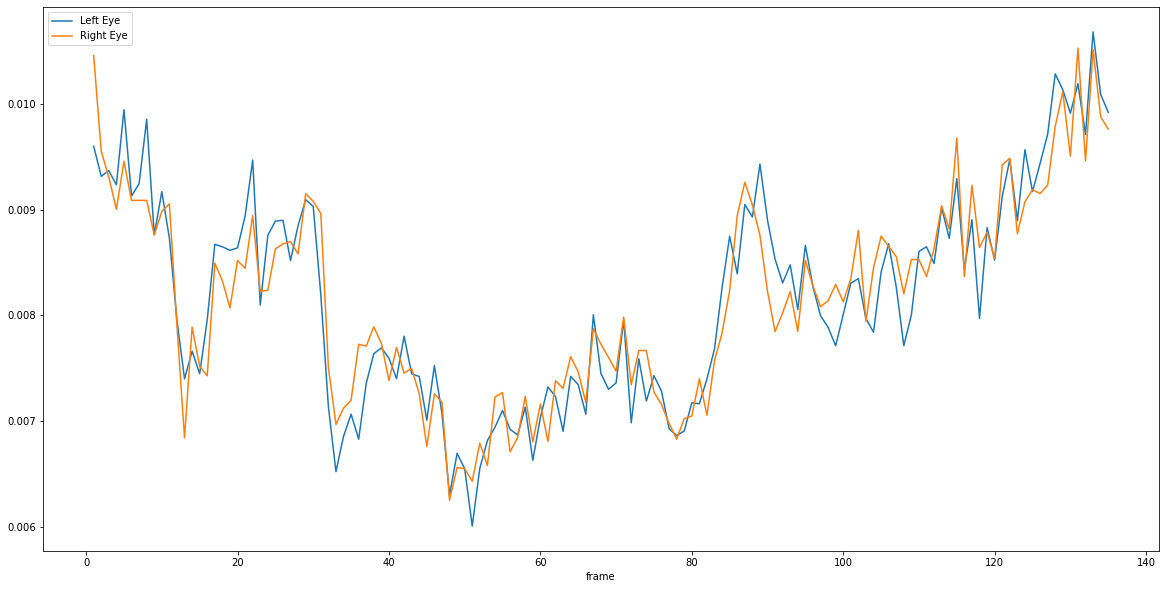

In [29]:
chars_df.plot(y=['L_eye_area', 'R_eye_area'], 
              label=['Left Eye', 'Right Eye'], 
              figsize=(20, 10))
plt.show()

<AxesSubplot:xlabel='frame'>

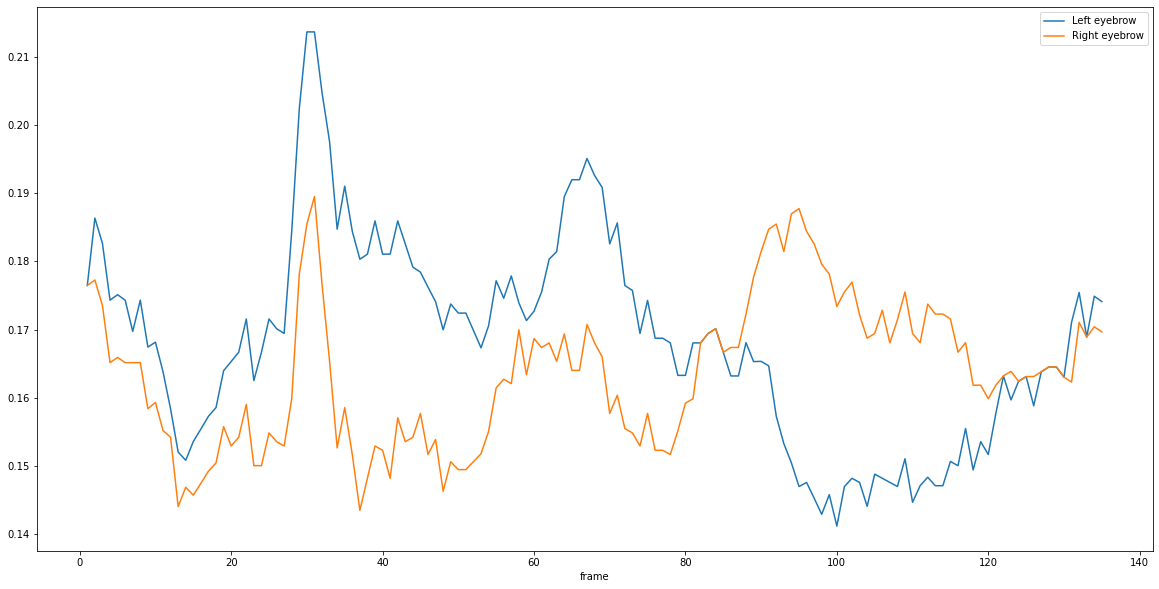

In [30]:
chars_df.plot(y=['L_brow_h', 'R_brow_h'],
              label=['Left eyebrow', 'Right eyebrow'],
              figsize=(20, 10))

<AxesSubplot:xlabel='frame'>

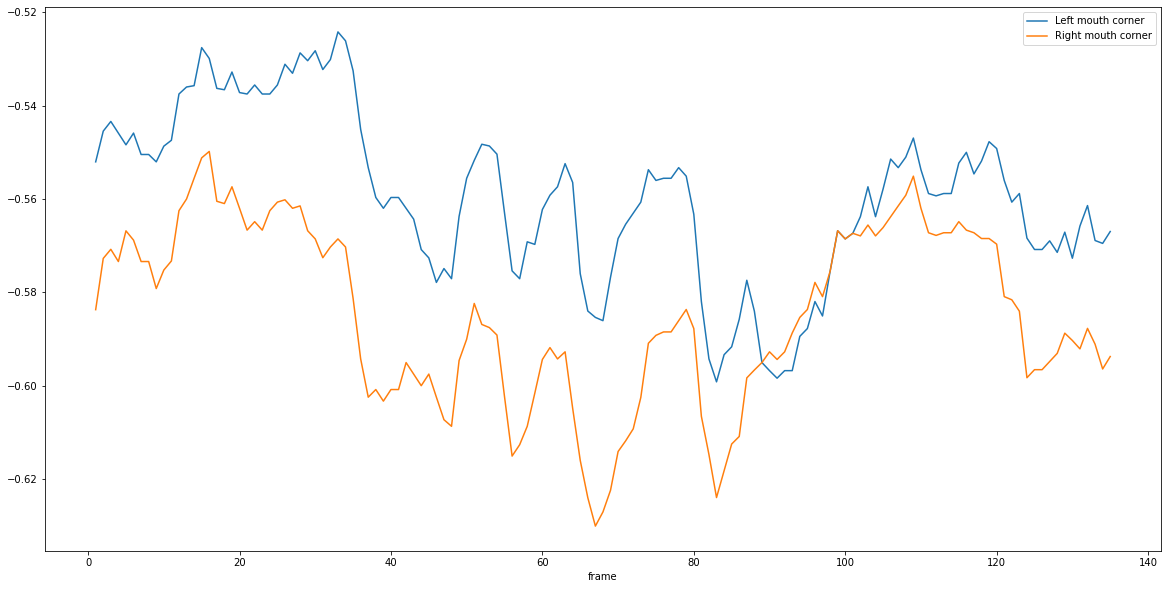

In [31]:
chars_df.plot(y=['L_mouth_h', 'R_mouth_h'],
              label=['Left mouth corner', 'Right mouth corner'],
              figsize=(20, 10))

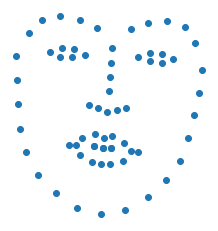

Frame 66


In [32]:
show_landmarks(standard_df, 66)